# Importando bibliotecas

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.min_rows',60)

%matplotlib inline

# Baixando e tratando os dados

In [2]:
padrao = re.compile(r'txt')

In [3]:
texto = []
for p in os.listdir(path='./genius'):
    if not re.search(padrao,p):
        for txt in os.listdir(path=f'./genius/{p}'):
            if re.search(padrao,txt):
                with open(f'./genius/{p}/{txt}', 'r', encoding = 'utf-8') as ep:
                    for ln in ep.read().split('\n'):
                        texto.append(ln)

In [4]:
len(texto)

68166

In [5]:
# Criando o DF
df = pd.DataFrame(texto, columns=['texto'])
# Limpando linhas vazias
df.dropna(inplace=True)
df.drop(df[df['texto']==''].index, inplace=True)
df.reset_index(drop=True, inplace=True)
# Criando a coluna para identificar as conversas
df['conversa'] = df['texto'].apply(lambda x: 1 if ':' in x else 0)

In [6]:
# Criando a coluna para identificar cada cena
c=0
cenas = []
for i in range(len(df)):
    c += 1 if df.iloc[i,1] == 0 else 0
    cenas.append(c)

df['cena'] = cenas

In [7]:
# Separando o nome dos personagens
df['personagem'] = df[df['conversa']==1]['texto'].str.split(':')
df['personagem'] = df['personagem'].apply(lambda x: x[0].upper() if type(x) == type(list()) else None)

In [8]:
df['cena'].value_counts().sum()

35884

In [32]:
df

,texto,conversa,cena,personagem
0,EPISODE 1 - WINTER IS COMING,0,1,None
1,[First scene opens with three Rangers riding t...,0,2,None
2,WAYMAR ROYCE: What d’you expect? They’re savag...,1,2,WAYMAR ROYCE
3,WILL: I’ve never seen wildlings do a thing lik...,1,2,WILL
4,WAYMAR ROYCE: How close did you get?,1,2,WAYMAR ROYCE
5,WILL: Close as any man would.,1,2,WILL
6,GARED: We should head back to the wall.,1,2,GARED
7,ROYCE: Do the dead frighten you?,1,2,ROYCE
8,GARED: Our orders were to track the wildlings....,1,2,GARED
9,ROYCE: You don’t think he’ll ask us how they d...,1,2,ROYCE


# Tratando o nome dos personagens

In [9]:
total = df['personagem'].value_counts()
lst = [i.upper() for i in total.index]
indice = [i+1 for i in range(len(total))]
cod_personagem = {i:j.upper() for i,j in enumerate(total.index)}
cod_frequencia = {i:j for i,j in enumerate(total.values)}

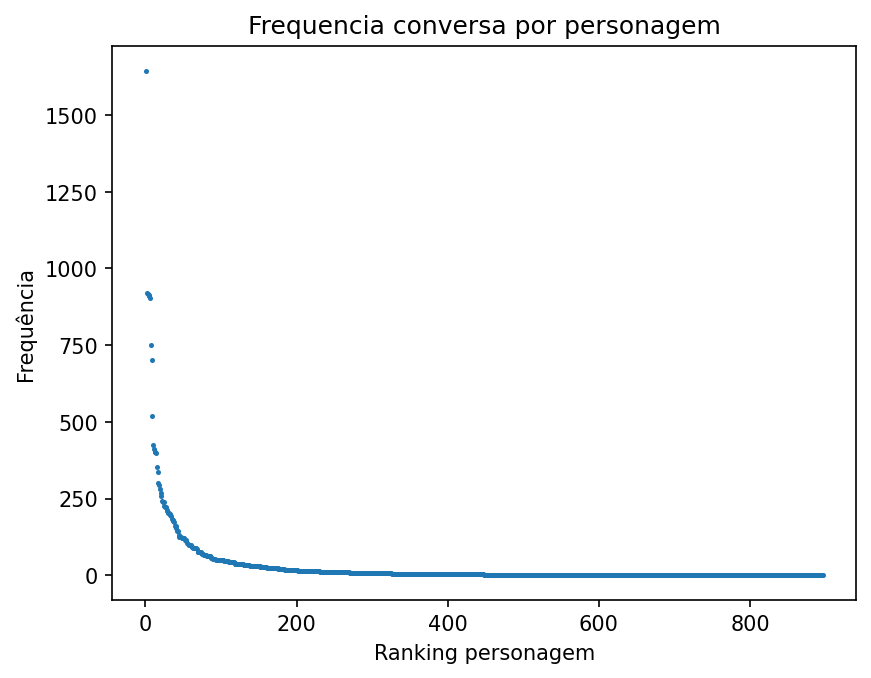

In [10]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=df['personagem'].value_counts(), s=2)
plt.title('Frequencia conversa por personagem')
plt.xlabel('Ranking personagem')
plt.ylabel('Frequência')
# plt.xscale('log')
# plt.yscale('log')
plt.show()
# plt.savefig()

In [11]:
total_acumulado = []
for i in range(len(total)) :
    if i == 0:
        total_acumulado.append(total[i])
    else:
        total_acumulado.append(total_acumulado[i-1] + total[i])

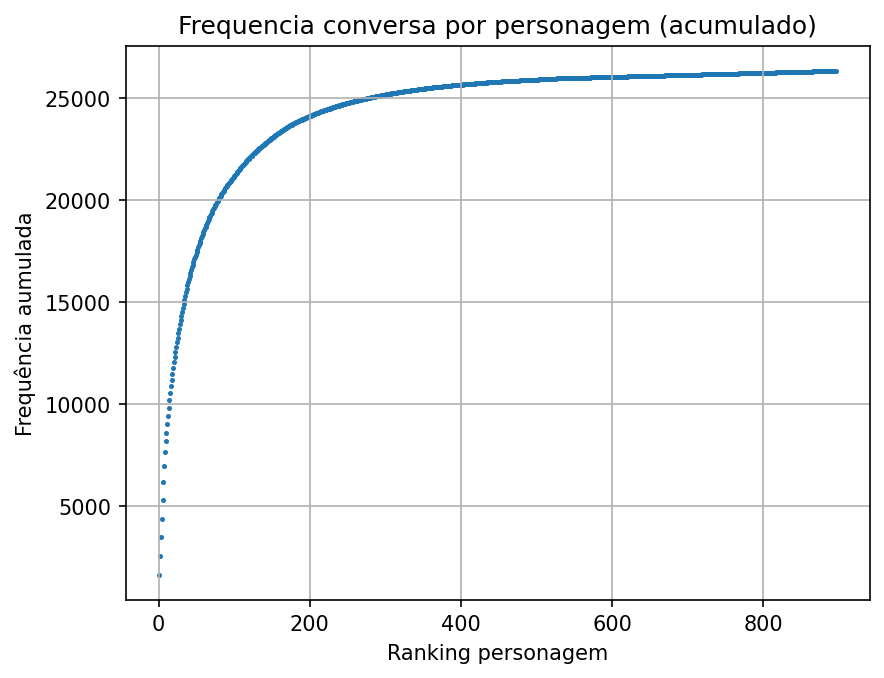

In [12]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Ranking personagem')
plt.ylabel('Frequência aumulada')
plt.grid()
plt.show()

In [13]:
media_total_acumulado = [(i/total_acumulado[-1])*100 for i in total_acumulado ]

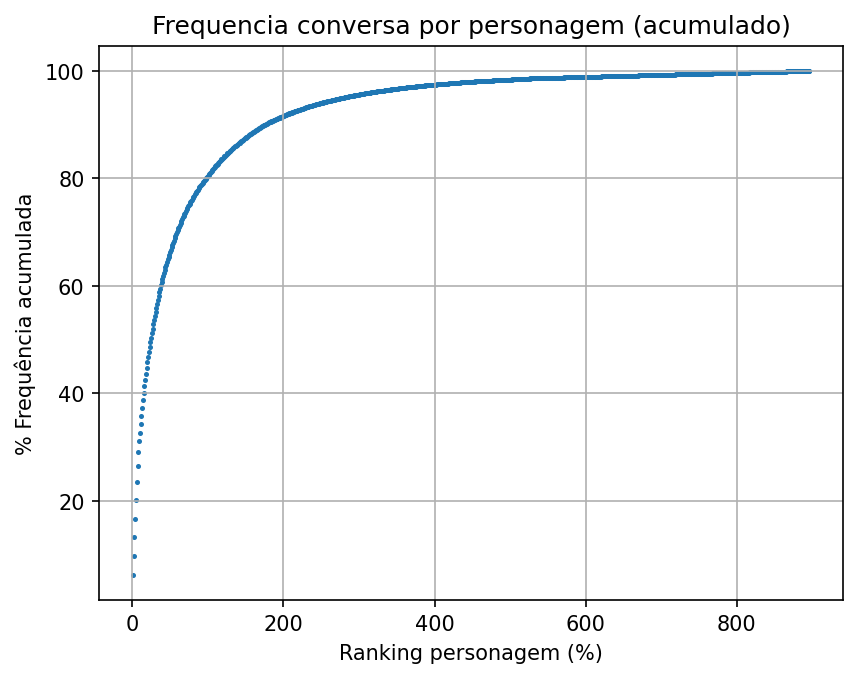

In [14]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=media_total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Ranking personagem (%)')
plt.ylabel('% Frequência acumulada')
plt.grid()
plt.show()

In [43]:
corte = 95
quantidade = len([i for i in media_total_acumulado if i < corte])

In [44]:
lista_personagem_mais_frequentes = list(total.index)[:quantidade]

In [45]:
lista_personagem_mais_frequentes

['TYRION',
 'CERSEI',
 'DAENERYS',
 'JON',
 'JAIME',
 'CUT TO',
 'SANSA',
 'ARYA',
 'DAVOS',
 'THEON',
 'VARYS',
 'BRONN',
 'SAM',
 'BRIENNE',
 'TYWIN',
 'BRAN',
 'JORAH',
 'STANNIS',
 'MARGAERY',
 'RAMSAY',
 'JON SNOW',
 'MELISANDRE',
 'ROBB',
 'EDDARD STARK',
 'SHAE',
 'MAN',
 'TORMUND',
 'LITTLEFINGER',
 'JOFFREY',
 'GENDRY',
 'TYRION LANNISTER',
 'OLENNA',
 'GILLY',
 'EXT',
 'MISSANDEI',
 'CATELYN',
 'YGRITTE',
 'INT',
 'DAARIO',
 'THE HOUND',
 'PODRICK',
 'OSHA',
 'YARA',
 'OBERYN',
 'BAELISH',
 'SANDOR',
 'TOMMEN',
 'QYBURN',
 'CATELYN STARK',
 'GREY WORM',
 'JAQEN',
 'PETYR BAELISH',
 'TALISA',
 'THOROS',
 'BERIC',
 'DAENERYS TARGARYEN',
 'ROBERT BARATHEON',
 'SAMWELL',
 'MEERA',
 'ARYA STARK',
 'SHIREEN',
 'ROBB STARK',
 'EURON',
 'HOUND',
 'HIGH SPARROW',
 'JORAH MORMONT',
 'SANSA STARK',
 'GRENN',
 'JOJEN',
 'ROOSE',
 'HOT PIE',
 'LORAS',
 'ROS',
 'CERSEI BARATHEON',
 'PYCELLE',
 'BARRISTAN',
 'THEON GREYJOY',
 'MANCE',
 'LANCEL',
 'JAIME LANNISTER',
 'MAN #2',
 'LOCKE',
 'EL

In [46]:
depara = personagens_principais = {
    "TYRION": "TYRION LANNISTER",
    "JON": "JON SNOW",
    "JAIME": "JAIME LANNISTER",
    "CERSEI": "CERSEI LANNISTER",
    "DAENERYS": "DAENERYS TARGARYEN",
    "BRONN": "BRONN",
    "SAM": "SAMWELL TARLY",
    "SANSA": "SANSA STARK",
    "YGRITTE": "YGRITTE",
    "ARYA": "ARYA STARK",
    "THEON": "THEON GREYJOY",
    "VARYS": "VARYS",
    "ROBB": "ROBB STARK",
    "Joffrey" : 'JOFFREY BARATHEON',
    "BRINENNE": 'Brienne de Tarth',
    "BRIENNE": "BRIENNE DE TARTH",
    "JOFFREY": 'JOFFREY BARATHEON',
    "BRAN": 'BRAN STARK',
    "OLENNA": "OLLENA TYRELL",
    "CATELYN": "CATELYN STARK",
    "MARGAERY": "Margaery Tyrell",
    "TYWIN": "Tywin Lannister",
    "STANNIS": 'Stannis Baratheon',
    "DAVOS": 'Davos Seaworth',
    "AEMON": "Meistre Aemon",
    "AERON": "Aeron Greyjoy",
    "AERSON": "Aeron Greyjoy",
    "ALLISER": "Alliser Thorne",
    "ALLISER THORN": "Alliser Thorne",
    "ALLISER THORNE":"Alliser Thorne",
    "ALLISER THORNE": "Alliser Thorne",
    "ALLISER THRONE": "Alliser Thorne",
    "ALLISTER": "Alliser Thorne",
    "ALTON": "Alton Lannister",
    "AMORY": "Amory Lorch",
    "AHSA": "Asha Greyjoy",
    "ANGUY ": "ANGUY",
    "ANGUY": 'ANGUY',
    "ARAY":"ARYA STARK",
    "AREO": "Areo Hotah",
    "ARTHUR": "Arthur Dayne",
    "AYRA": "ARYA STARK",
    "BAELISH": "LITTLEFINGER",
    "BALON": "Balon Greyjoy",
    "BALON DWARF": "Balon Greyjoy",
    "BARRISTAN": "BARRISTAN SELMY",
    "BARRISTON": "BARRISTAN SELMY",
    "BELICHO": "Belicho Paenymion",
    "BRAN": "BRAN STARK",
    "BENJEN": 'BENJEN STARK',
    "BERIC": 'Beric Dondarrion',
    "BRAND": "BRAN STARK",
    "BRANN STARK": "BRAN STARK",
    "BRON": 'BRONN',
    "BRYNDEN":"Brynden Tully",
    "BUER": 'BUYER',
    "CASSEL": "Rodrik Cassel",
    "CATELYIN": 'Catelyn Stark',
    "CATELYN": 'Catelyn Stark',
    "CATELYN STARK" : 'Catelyn Stark',
    "CATELYN" : "Catelyn Stark",
    "CERSEI BARATHEON": "CERSEI LANNISTER",
    "CERSEI LANNISTER": "CERSEI LANNISTER",
    "CERSEL": "CERSEI LANNISTER",
    "CERSIE": "CERSEI LANNISTER",
    "CESEI": "CERSEI LANNISTER",
    "BLACKSMITH"  : 'Gendry Baratheon',
    "BLACKFISH" : "Brynden Tully",
    "COLEN": "Colen of Greenpools",
    "CRESSEN": "Maester Cressen",
    "DAAERIO": 'Daario Naharis',
    "DAARIO": 'Daario Naharis',
    "DAENARYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS TARGARYEN" : "Daenerys Targaryen",
    "DAERNEYS": "Daenerys Targaryen",
    "DAEYNERYS" : "Daenerys Targaryen",
    "DAGMER" : 'Dagmer Cleftjaw',
    "DANAERYS" : "Daenerys Targaryen",
    "DANERYS" : "Daenerys Targaryen",
    "DANY" : "Daenerys Targaryen",
    "DARIO" : 'Daario Naharis',
    "DARRIO" : 'Daario Naharis',
    "DAV OS" : 'Davos Seaworth',
    "DAVOS" : "Davos Seaworth",
    "DEANERYS TARGARIAN" : "Daenerys Targaryen",
    "DENERYS": "Daenerys Targaryen",
    "DERRYK" : "Derrick Darry",
    "DICKON" : "Dickon Tarly",
    "DOLOROUD EDD" : "Eddison Tollett",
    "DOLOROUS EDD" : "Eddison Tollett",
    "DOLROUS EDD" : "Eddison Tollett",
    "ED" : "EDDARD STARK",
    "EDD" : "EDDARD STARK",
    "EDDARD STARK" : 'EDDARD STARK',
    "EDDARK STARK" : 'EDDARD STARK',
    "EDDISION" : "Eddison Tollett",
    "EDDISON" :  "Eddison Tollett",
    "EDMURE" : "EDMURE TULLY",
    "ELARIA" : 'ELLARIA SAND',
    "ELLARIA" : 'ELLARIA SAND',
    "ELLIA" : 'ELIA MARTELL',
    "ERSEI" : "CERSEI LANNISTER",
    "EURION" : "Euron Greyjoy",
    "EURON" : "Euron Greyjoy",
    "GENDRY" : "	GENDRY BARATHEON",
    "GRAND MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "GRAND MAESTER PYRCELLE" : "Grande Meistre Pycelle",
    "GREYWORM" : 'GREY WORM',
    "HIZDAHR" : "HIZDAHR ZO LORAQ",
    "ILLYRIO" : "Illyrio Mopatis",
    "ILLYRIO MOPATIS" : 'Illyrio Mopatis',
    "INNKEEPER" : 'Masha Heddle',
    "JAMIE LANNISTER" : "JAIME LANNISTER",
    "JANOS" : 'JANOS SLYNT',
    "JANOS SLUNT" : 'JANOS SLYNT',
    "JEOR" : "JEOR MORMONT",
    "JOFFFREY" : 'JOFFREY BARATHEON',
    "JOHN" : "JON SNOW",
    "JOJEN" : 'Jojen Reed',
    "JORA" : "JORAH MORMONT",
    "JORAH" : "JORAH MORMONT",
    "KARL" : 'KARL TANNER',
    "KARSTARK" : 'Harald Karstark',
    "KEVAN" : 'KEVAN LANNISTER',
    "KING JOFFREY" : 'JOFFREY BARATHEON',
    'KRAZNYS' : 'KRAZNYS MO NAKLOZ',
    "LADY ANYA" : 'Anya Waynwood',
    "LADY OLENNA" : 'Olenna Tyrell',
    "LADY WALDA" : 'Walda Gorda Frey',
    "LADYC RANE" : 'LADY CRANE',
    "LANCEL" : 'LANCEL LANNISTER',
    "LOLLYS" : 'LOLLYS STOKEWORTH',
    "LOMMY" : 'LOMMY GREENHANDS',
    "LORAS" : '	LORAS TYRELL',
    "LYANNA" : 'LYANNA MORMONT',
    "LYSA" : 'LYSA ARRYN',
    "MACE" : 'MACE TYRELL',
    "MAESTER PYCELL" : "Grande Meistre Pycelle",
    "MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "MARTYN" : 'Martyn Lannister',
    "MARYN TRANT" : 'MERYN TRANT',
    "MERYN" : 'MERYN TRANT',
    "MEERA" : 'MEERA REED',
    "MEISTRE AEMON" : 'MAESTER AEMON',
    "MELISDANDRE" : 'MELISANDRE',
    "MERYN" : 'MERYB TRANT',
    "MHAEGAN" : 'MHAEGEN',
    "MOSADOR" : 'MOSSADOR',
    "MOUNTAIN" : "Gregor Clegane",
    "MOUNTIAN" : "Gregor Clegane",
    "MYRCELLA" : 'MYRCELLA BARATHEON',
    "NED" : 'Eddard Stark',
    "NED STARK" : 'Eddard Stark',
    "OLEANNA" : 'Olenna Tyrell',
    "OLLENA TYRELL" : 'Olenna Tyrell',
    "OTHELL YARWICK" : "OTHELL YARWYCK",
    "PETYR" : 'LITTLEFINGER',
    "PETYR BAELISH" : 'LITTLEFINGER',
    "PYATT PREE" : 'PYAT PREE',
    "PYATTPREE" : 'PYAT PREE',
    "PYCELL" : "Grande Meistre Pycelle",
    "PYCELLE" : "Grande Meistre Pycelle",
    "PYELLE" : "Grande Meistre Pycelle",
    "PYP" : "PYPAR",
    "RAMSAY" : 'RAMSAY BOLTON',
    "RAMSEY" : 'RAMSAY BOLTON',
    "RENLY" : "RENLY BARATHEON",
    "RICKON" : 'RICKON STARK',
    "RHAKARO" : 'RAKHARO',
    "RHAKHARO" : 'RAKHARO',
    "RICKARD" : "RICKARD KARSTARK",
    "RIKON" : 'RICKON STARK',
    "ROBERT" : 'ROBERT BARATHEON',
    "ROBETT" : 'ROBETT GLOVER',
    "ROBIN" : "ROBIN ARRYN",
    "RODRICK CASSEL" : 'RODRIK CASSEL',
    "RODRIK CASSAL" : 'RODRIK CASSEL',
    "RODRIK" : 'RODRIK CASSEL',
    "ROOSE" : 'ROOSE BOLTON',
    "SAAN" : "Salladhor Saan",
    "SALLADHOR" : "Salladhor Saan",
    "SALLADOR" : "Salladhor Saan",
    "SAMMY" : "SAMWELL TARLY",
    "SAMWEL TARLY" : "SAMWELL TARLY",
    "SAMWELL" : "SAMWELL TARLY",
    "SANDOR" : "SANDOR CLEGANE",
    "SER JORAH" : 'Jorah Mormont',
    "SER ALLISER" : 'Alliser Thorne',
    "SER BARRISTAN" : "Barristan Selmy",
    "SER DONTOS" : 'Dontos Hollard',
    "SER RODRIK" : "Rodrik Cassel",
    "SER VARDIS" : 'Vardis Egen',
    "TYRIOM" : 'TYRION LANNISTER',
    "TYRON" :  'TYRION LANNISTER',
    "TYWEN" : 'TYWIN LANNISTER',
    "TWYIN" : 'TYWIN LANNISTER',
    "VISERYS" : 'VISERYS TARGARYEN', 
    "WALDERY FREY" : 'Walder Frey',
    "WALDER FREY" : 'Walder Frey',
}

In [66]:
#regex
padrao = re.compile(r'\([^)]*\)')
#removendo parênteses
result = [re.sub(padrao,'',i).strip() for i in lista_personagem_mais_frequentes]

result2 = [depara[i].upper() if i in depara else i.upper() for i in result]
result2 = set(result2)
lista_personagem = list(result2)
#removendo linhas com parênteses e ponto
remover = ['\t', '.','[',']', 'SOLDIER', 'MAN ', 'GUARD', 'CUT']
lista_personagem = [i.upper() for i in lista_personagem if not any(c in i for c in remover)]
#remover = ['CUT TO', 'EXT', 'INT']


print(len(lista_personagem))
lista_personagem_final = sorted(lista_personagem)

212


In [67]:
lista_personagem_final

['AERON GREYJOY',
 'ALL',
 'ALLISER THORNE',
 'ALTON LANNISTER',
 'AMORY LORCH',
 'ANGUY',
 'ANYA WAYNWOOD',
 'ARYA STARK',
 'BALON GREYJOY',
 'BARRISTAN SELMY',
 'BENJEN STARK',
 'BERIC DONDARRION',
 'BLACK HAIRED PROSTITUTE',
 'BLACK LORREN',
 'BLACK WALDER',
 'BOBONO',
 'BRAN STARK',
 'BRIENNE DE TARTH',
 'BRONN',
 'BRYNDEN TULLY',
 'CAMELLO',
 'CAPTAIN',
 'CATELYN STARK',
 'CERSEI LANNISTER',
 'CLARENZO',
 'CRASTER',
 'CROWD',
 'DAARIO NAHARIS',
 'DAENERYS TARGARYEN',
 'DAGMER CLEFTJAW',
 'DAVOS SEAWORTH',
 'DERRICK DARRY',
 'DICKON TARLY',
 'DONTOS HOLLARD',
 'DORAN',
 'DOREAH',
 'DYING MAN',
 'EDDARD STARK',
 'EDDISON TOLLETT',
 'EDMURE TULLY',
 'ELLARIA SAND',
 'EURON GREYJOY',
 'EXT',
 'FARMER HAMLET',
 'FENNESZ',
 'GATINS',
 'GILLY',
 'GIRL',
 'GOLD CLOAK',
 'GRANDE MEISTRE PYCELLE',
 'GREATJON UMBER',
 'GRENN',
 'GREY WORM',
 'HARRAG',
 'HAYLENE',
 'HIGH SEPTON',
 'HIGH SPARROW',
 'HIZDAHR ZO LORAQ',
 'HODOR',
 'HOT PIE',
 'HOUND',
 'ILLYRIO MOPATIS',
 'INT',
 'IRRI',
 'IZEMB

# Início da criação dos grafos

In [68]:
import networkx as nx

In [63]:
lista_personagens = list(df['personagem'].str.strip().drop_duplicates())
lista_personagens.pop(0)
len(lista_personagens)

892

In [21]:
padrao = re.compile('\(|\)')

In [22]:
c=0
for i in lista_personagens:
    resultado = re.search(padrao,i)
    if resultado:
        c+=1        
print(f'{c} personagem com parênteses')

164 personagem com parênteses


In [23]:
while c != 0:
    c=0
    for i in range(len(lista_personagens)):
        if i >= len(lista_personagens): break
        x = lista_personagens[i]
        resultado = re.search(padrao,x)
        if resultado or '[' in x or ']' in x or '"' in x or "CUT" in x or "WOMAN" in x or "MAN" in x or "SOLDIER" in x: 
            lista_personagens.pop(i)
            i-=2
            c+=1

    print(f'{c} linhas apagadas.')

153 linhas apagadas.
64 linhas apagadas.
17 linhas apagadas.
4 linhas apagadas.
1 linhas apagadas.
0 linhas apagadas.


In [69]:
lista_personagem_final.sort()
len(lista_personagem_final)

212

In [71]:
index_personagens = [x for x in range(len(lista_personagem_final))]
len(index_personagens)

212

In [72]:
G = nx.Graph()

In [73]:
G.add_nodes_from(index_personagens)
print(G)

Graph with 212 nodes and 0 edges


In [75]:
edges = []
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem'].drop_duplicates().str.upper():
        pers.append(p) if p in lista_personagem_final else None
    
    if len(pers) > 0:
        for x in pers:
            for y in pers:
                edges.append((lista_personagem_final.index(x), lista_personagem_final.index(y))) if x != y else None

len(edges)

2422

In [76]:
G.add_edges_from(edges)

In [77]:
print(G)

Graph with 212 nodes and 489 edges


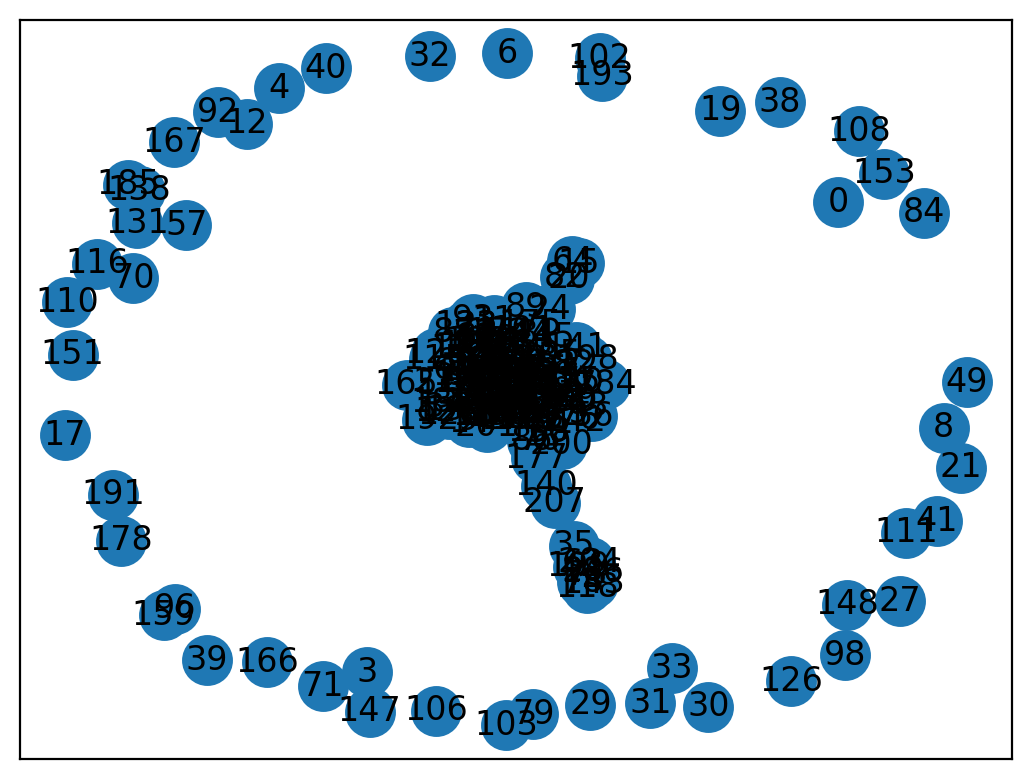

In [78]:
plt.figure(dpi=200)
nx.draw_networkx(G)